# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Load training, validation, and test data

training_file = '/home/mikedef/udacity/udacity-self-driving-car/CarND-Traffic-Sign-Classifier-Project/train.p'
validation_file= '/home/mikedef/udacity/udacity-self-driving-car/CarND-Traffic-Sign-Classifier-Project/valid.p'
testing_file = '/home/mikedef/udacity/udacity-self-driving-car/CarND-Traffic-Sign-Classifier-Project/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [13]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = train['features'].shape[0]

# TODO: Number of validation examples
n_validation = valid['features'].shape[0]

# TODO: Number of testing examples.
n_test = test['features'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(test['labels']))

# Read in the sign names
sign_names = pd.read_csv('/home/mikedef/udacity/udacity-self-driving-car/CarND-Traffic-Sign-Classifier-Project/signnames.csv')

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
sign_names.head(43)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.


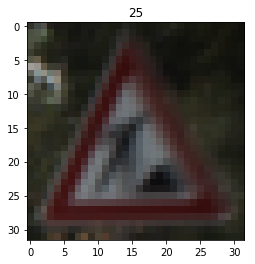

In [14]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.


import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(4,4))
plt.imshow(image)
plt.title(y_train[index])
plt.show()

lable = y_train[index]
mpimg.imsave(('writeup/' + 'DataExploration_lable' + lable.astype(str) + '.png'), image)

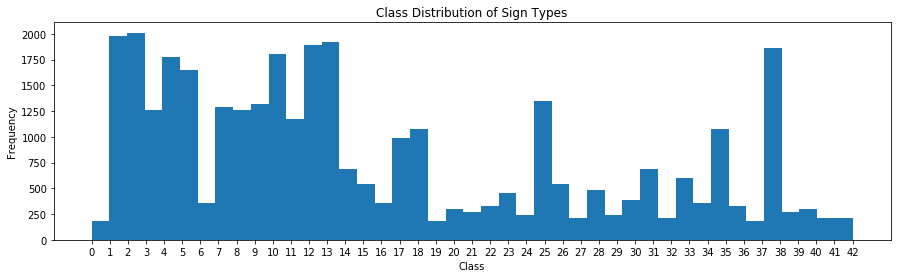

In [15]:
# Plot a histogram of the distribution of sign types 
plt.figure(figsize=(15,4))
plt.title('Class Distribution of Sign Types')
plt.hist(train['labels'], bins=n_classes)
plt.xticks(range(n_classes))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [16]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [17]:
import cv2 

# Preprocessing Helper Functions

# convert image to grayscale since color does not provide much information 
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Normalize the image so that the data has mean zero and equal variance
# https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c
def normalize(img):
    return ((img - np.mean(img)) / np.std(img))
# Original image are between 0 and 255, they are now normalized between -1 and 1

# read in and resize images
def read_new_images(files_path):
    images = []
    
    for file_path in files_path:
        img = cv2.cvtColor(cv2.imread(file_path),cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (image_shape[0], image_shape[1]))
        images.append(img)
        
    return np.array(images, dtype='uint8')

def preprocess(images):
    new_images = []
    for img in images:
        gray = grayscale(img)
        normalized = normalize(gray)
        new_images.append(normalized)
        
    return np.array(new_images)
    

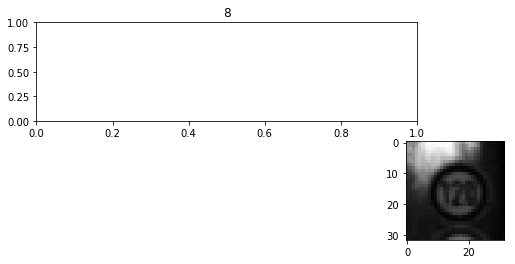

In [25]:
# View and save a few test images before and after preprocessing. 

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
gray = grayscale(image)
normalized = normalize(gray)


plt.figure(figsize=(15,4))
plt.imshow(image)
plt.subplot(211)
plt.imshow(gray, cmap='gray')
plt.subplot(212)
plt.imshow(normalized, cmap='gray')
plt.subplot(221)
plt.title(y_train[index])
plt.show()

lable = y_train[index]
mpimg.imsave(('writeup/' + 'preprocessed_lable' + lable.astype(str) + '.png'), image)
mpimg.imsave(('writeup/' + 'gray_lable' + lable.astype(str) + '.png'), gray, cmap='gray')
mpimg.imsave(('writeup/' + 'normalized_lable' + lable.astype(str) + '.png'), normalized, cmap='gray')



In [12]:
# Preprocess Data Set
X_train = preprocess(X_train)[:,:,:,np.newaxis]
X_valid = preprocess(X_valid)[:,:,:,np.newaxis]
X_test = preprocess(X_test)[:,:,:,np.newaxis]

TypeError: 'numpy.ndarray' object is not callable

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [8]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

### Model Architecture

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.


### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. I converted the images to grayscale to keep with the original LeNet architecture. This means C = 1, if I kept the images as RGB, C = 3. 

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** ReLU

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** ReLU

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** ReLU

**Dropout:** Apply dropout

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** ReLU

**Dropout:** Apply dropout

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 Grayscale image						| 
| Convolution 3x3     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					| Activation									|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6				    |
| Convolution 3x3	    | 1x1 stride, valid padding, outputs10x10x16	|
| RELU					| Activation									|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16				    |
| Fully connected		| Input = 400. Output = 120        				|
| RELU					| Activation									|
| Dropout				| keep_prob = 0.6  								|
| Fully connected		| Input = 120. Output = 84        				|
| RELU					| Activation									|
| Dropout				| keep_prob = 0.6  								|
|						|												|
|						|												|

### Output
Return the result of the 2nd fully connected layer.

In [9]:
X_train.shape

(34799, 32, 32, 1)

In [10]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Change the input shape from 1 to 3 if using color images 
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Adding Dropout 
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Adding Dropout
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Update the shape to match the output of the dataset i.e 43
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) # Change the shape depth if using color images
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43) # Change for number of outputs

## Training Pipeline
Create a training pipeline that uses the model to classify German traffic sign data.



In [12]:
rate = 0.0005  # changed from 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    train_accuracy_figure = []
    validation_accuracy_figure = []
    test_accuracy_figure = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
            
        train_accuracy = evaluate(X_train, y_train)
        train_accuracy_figure.append(train_accuracy)
        #validation_accuracy = sess.run(accuracy_operation, feed_dict={x: X_valid, y: y_valid, keep_prob: 1.0})
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_figure.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_sign_classifier_withDropout3_laptop.ckpt')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.642
Validation Accuracy = 0.565

EPOCH 2 ...
Training Accuracy = 0.832
Validation Accuracy = 0.760

EPOCH 3 ...
Training Accuracy = 0.896
Validation Accuracy = 0.827

EPOCH 4 ...
Training Accuracy = 0.923
Validation Accuracy = 0.858

EPOCH 5 ...
Training Accuracy = 0.939
Validation Accuracy = 0.874

EPOCH 6 ...
Training Accuracy = 0.948
Validation Accuracy = 0.890

EPOCH 7 ...
Training Accuracy = 0.960
Validation Accuracy = 0.902

EPOCH 8 ...
Training Accuracy = 0.965
Validation Accuracy = 0.903

EPOCH 9 ...
Training Accuracy = 0.970
Validation Accuracy = 0.917

EPOCH 10 ...
Training Accuracy = 0.976
Validation Accuracy = 0.932

EPOCH 11 ...
Training Accuracy = 0.978
Validation Accuracy = 0.922

EPOCH 12 ...
Training Accuracy = 0.983
Validation Accuracy = 0.939

EPOCH 13 ...
Training Accuracy = 0.985
Validation Accuracy = 0.932

EPOCH 14 ...
Training Accuracy = 0.987
Validation Accuracy = 0.938

EPOCH 15 ...
Training Accuracy = 0.989
Valid

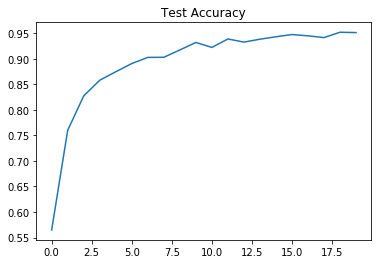

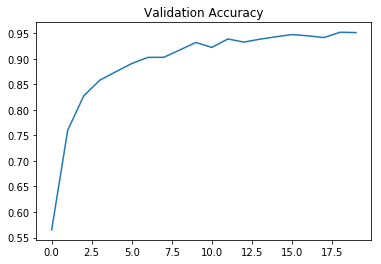

In [16]:
plt.plot(validation_accuracy_figure)
plt.title("Test Accuracy")
plt.show()

plt.plot(validation_accuracy_figure)
plt.title("Validation Accuracy")
plt.show()

In [25]:
with tf.Session() as sess:
    saver.restore(sess, './lenet_sign_classifier_withDropout3_laptop.ckpt')

    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Train Accuracy = 0.993
Valid Accuracy = 0.951
Test Accuracy = 0.925


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

**************************************************
New images for testing
**************************************************


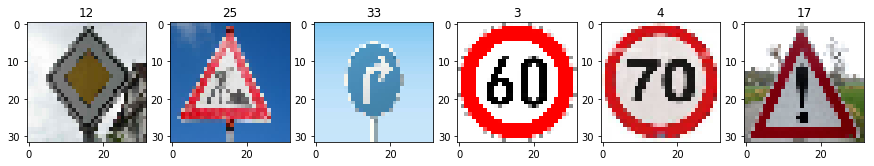

In [20]:
### Load the images and plot them here.
sign_names = pd.read_csv('/home/mikedef/udacity/udacity-self-driving-car/CarND-Traffic-Sign-Classifier-Project/signnames.csv')
new_images_directory = ['./GermanSign1.jpg', 'GermanSign2.jpg', 'GermanSign3.jpg', 'GermanSign4.jpg',
                        'GermanSign5.jpg', 'GermanSign6.jpg']
new_image_labels = [12, 25, 33, 3, 4, 17]

new_images = read_new_images(new_images_directory)

#Plot images
print ('*' * 50)
print ('New images for testing')
print ('*' * 50)
plt.figure(figsize=(15,5))
for i, image in enumerate(new_images):
    plt.subplot(2, 6, i+1)
    img = new_images[i].squeeze()
    plt.imshow(img)
    plt.title(new_image_labels[i])

plt.show()



### Predict the Sign Type for Each Image

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

preprocess_new_images = preprocess(new_images)[:,:,:,np.newaxis]

with tf.Session() as sess:
    saver.restore(sess, './lenet_sign_classifier_withDropout3_laptop.ckpt')

    new_img_accuracy = evaluate(preprocess_new_images, new_image_labels)
    print("New Image Accuracy = {:.3f}".format(new_img_accuracy))

New Image Accuracy = 0.500


### Analyze Performance

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k=5)

with tf.Session() as sess:
    saver.restore(sess, './lenet_sign_classifier_withDropout1_laptop.ckpt')
    softmax_logits = sess.run(softmax, feed_dict={x: preprocess_new_images, keep_prob: 1.0})
    top_5 = sess.run(top_k, feed_dict={x: preprocess_new_images, keep_prob: 1.0})
    
top_5


TopKV2(values=array([[  9.99927044e-01,   7.28167506e-05,   1.62603854e-07,
          5.11710390e-08,   2.82572827e-08],
       [  9.96245921e-01,   1.92384352e-03,   6.28800888e-04,
          5.11999708e-04,   5.04457217e-04],
       [  6.59271121e-01,   2.27151126e-01,   8.39252993e-02,
          1.63520370e-02,   9.30295046e-03],
       [  9.68420804e-01,   2.02554837e-02,   4.03585425e-03,
          2.61326879e-03,   2.12481478e-03],
       [  3.44421983e-01,   2.33703151e-01,   1.54791921e-01,
          7.13244751e-02,   5.10859899e-02],
       [  9.91901934e-01,   6.01758901e-03,   2.07480928e-03,
          5.42416728e-06,   1.30891635e-07]], dtype=float32), indices=array([[12, 40, 41, 32, 42],
       [25, 29, 19, 24, 31],
       [35, 34, 11, 33, 28],
       [ 3,  2, 31, 11, 23],
       [ 1,  0, 18,  4,  5],
       [18, 27, 26, 11, 24]], dtype=int32))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

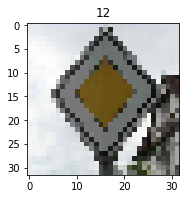

Probabilities: [  9.99927044e-01   7.28167506e-05   1.62603854e-07   5.11710390e-08
   2.82572827e-08] 
 predicted classes: [12 40 41 32 42]


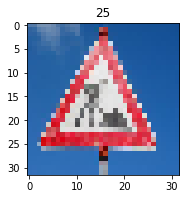

Probabilities: [  9.96245921e-01   1.92384352e-03   6.28800888e-04   5.11999708e-04
   5.04457217e-04] 
 predicted classes: [25 29 19 24 31]


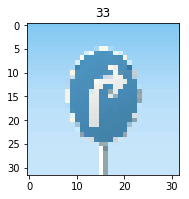

Probabilities: [ 0.65927112  0.22715113  0.0839253   0.01635204  0.00930295] 
 predicted classes: [35 34 11 33 28]


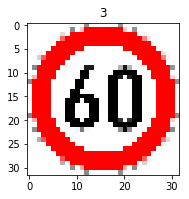

Probabilities: [ 0.9684208   0.02025548  0.00403585  0.00261327  0.00212481] 
 predicted classes: [ 3  2 31 11 23]


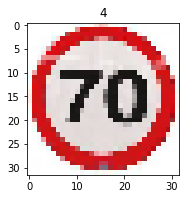

Probabilities: [ 0.34442198  0.23370315  0.15479192  0.07132448  0.05108599] 
 predicted classes: [ 1  0 18  4  5]


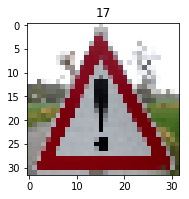

Probabilities: [  9.91901934e-01   6.01758901e-03   2.07480928e-03   5.42416728e-06
   1.30891635e-07] 
 predicted classes: [18 27 26 11 24]


In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

for i, image in enumerate(new_images):
    plt.subplot(121)
    img = new_images[i].squeeze()
    plt.imshow(img)
    plt.title(new_image_labels[i])
    plt.show()
    print('Probabilities:', top_5[0][i], '\n predicted classes:', top_5[1][i])




### New Image Discussion

The new images for testing as shown above were evaluated with a prediction accuracy of 50%. There are a few problem with the predictions on these images. The problems may arise due to the image quality. Another issue that I see is that some of the signs are not straight in the image. out of the three incorrectly classified images the correct classification is within the top five probabilities in two of the misclassified images. In the last image the classifier does not even classify within the top five probabilities.

I think that increasing the amount of test images will help with the predictions. In particular I think that using the same images, but modifying the images such that they are distorted, blurred, and off axis will help with these misclassifications in particular.


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")